In [1]:
import cv2
import numpy as np
import time
import glob
import pickle
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from includes.car_classification import *
from includes.car_detection import *
from includes.lanes_camera_calibration import *
from includes.lanes_detection import *

In [2]:
cal = pickle.load(open('camera_calibration/sekonix120.p', "rb"))
mtx = cal["mtx"]
dist = cal["dist"]

In [32]:
h = 1218
w = 1920
side = 400
extrinsic_src = np.float32([[952, 700],
                            [w-848, 700],
                            [300, 1050],
                            [w-300, 1050]])
extrinsic_dst = np.float32([[side, 0],
                            [w-side, 0],
                            [side, h],
                            [w-side, h]])

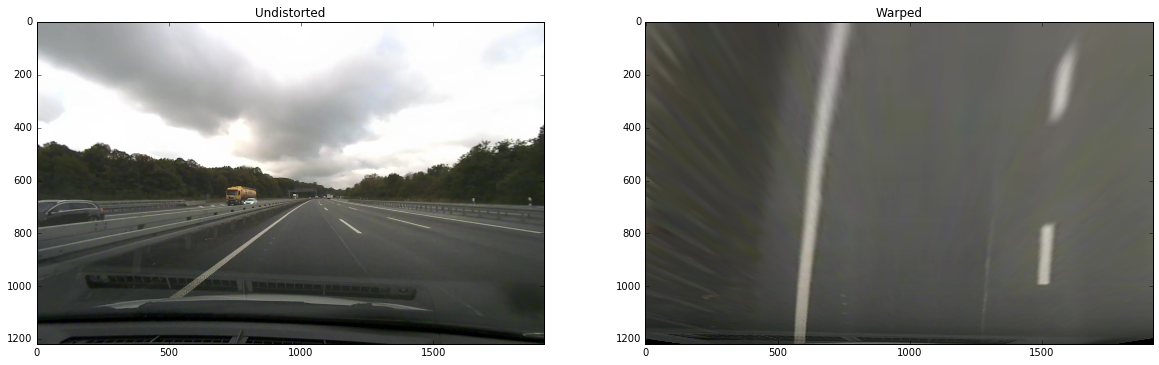

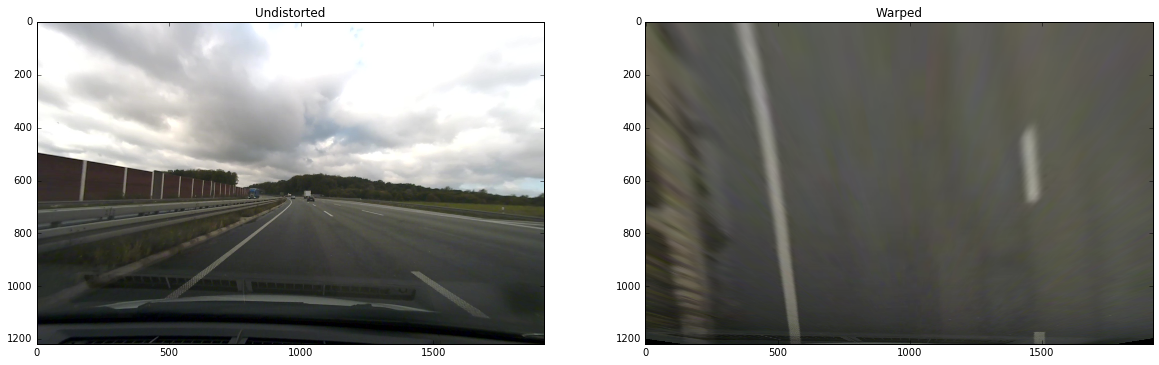

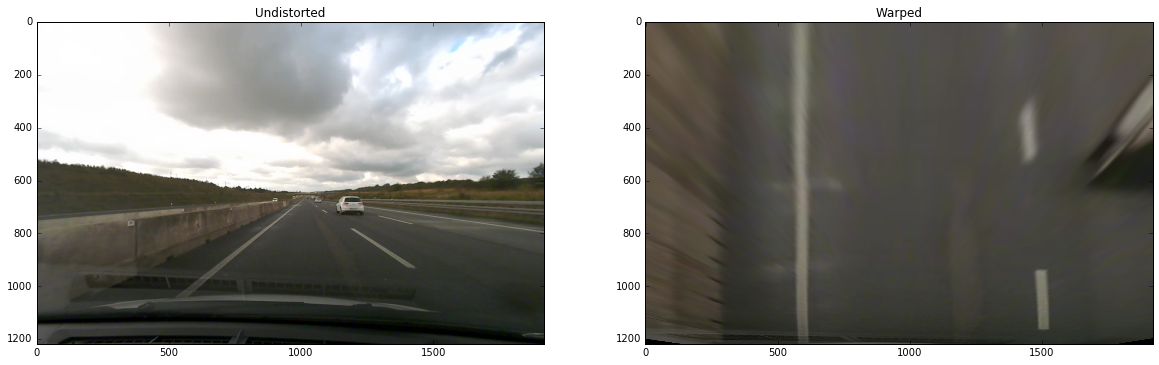

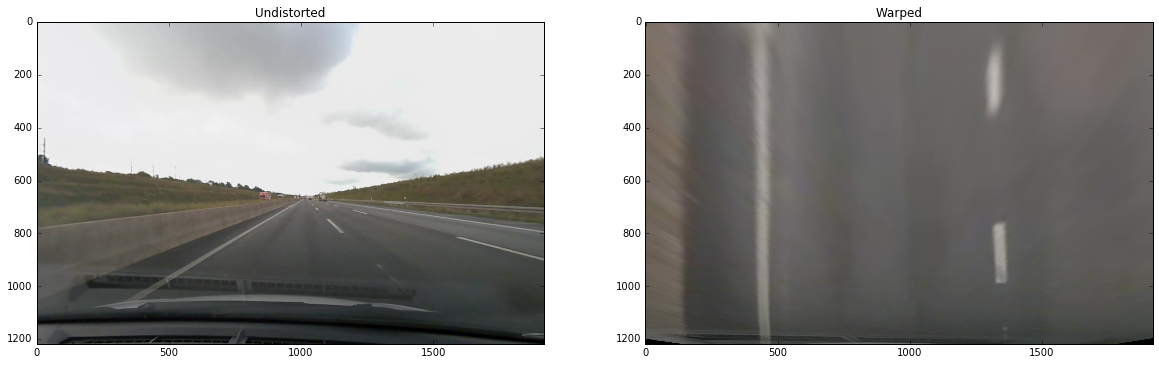

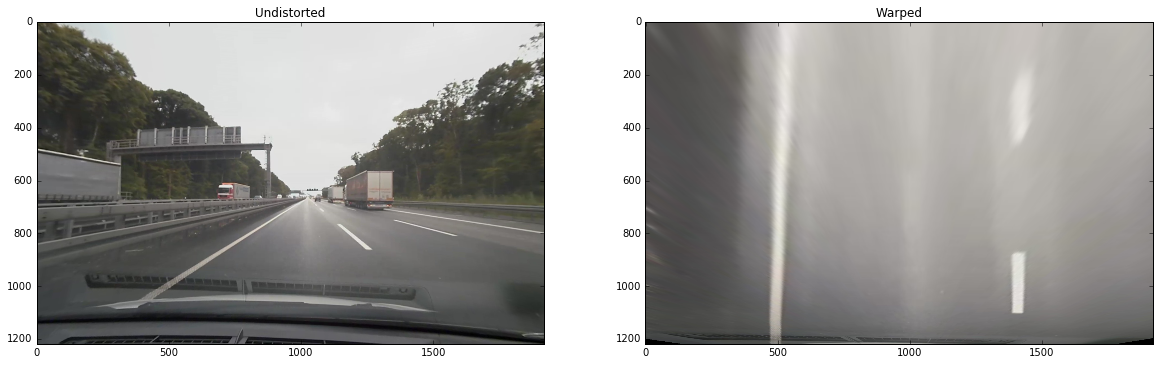

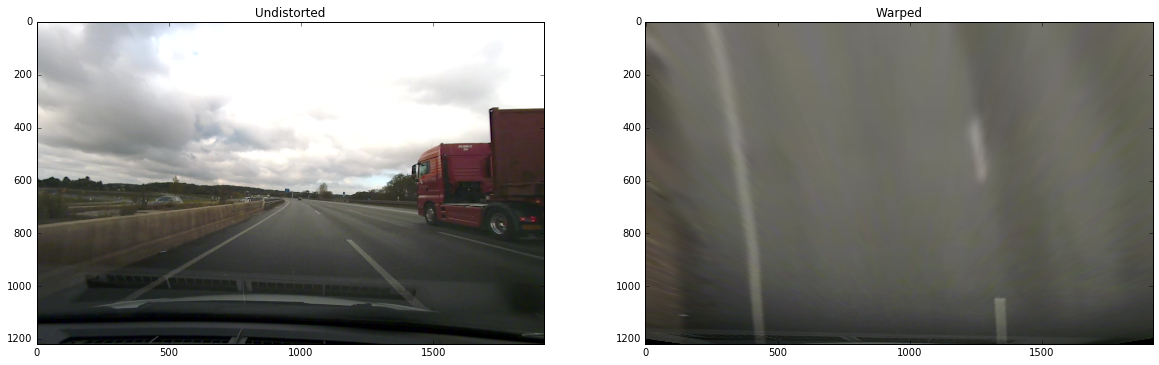

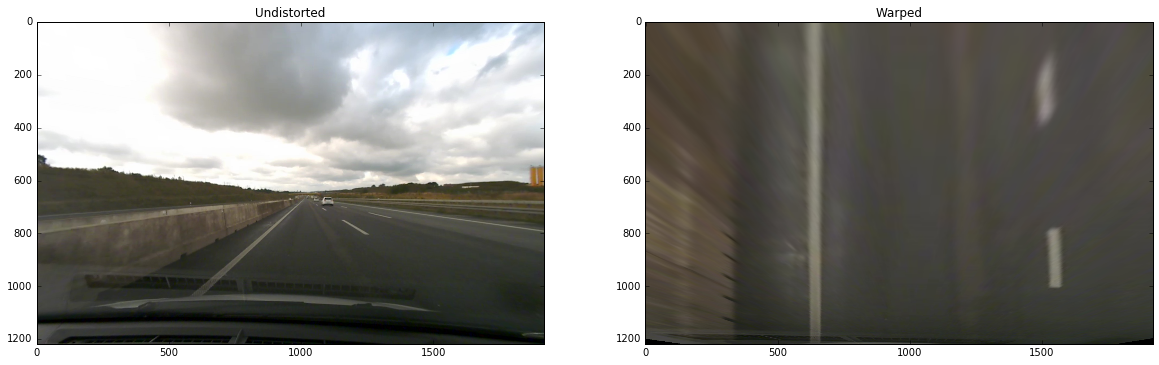

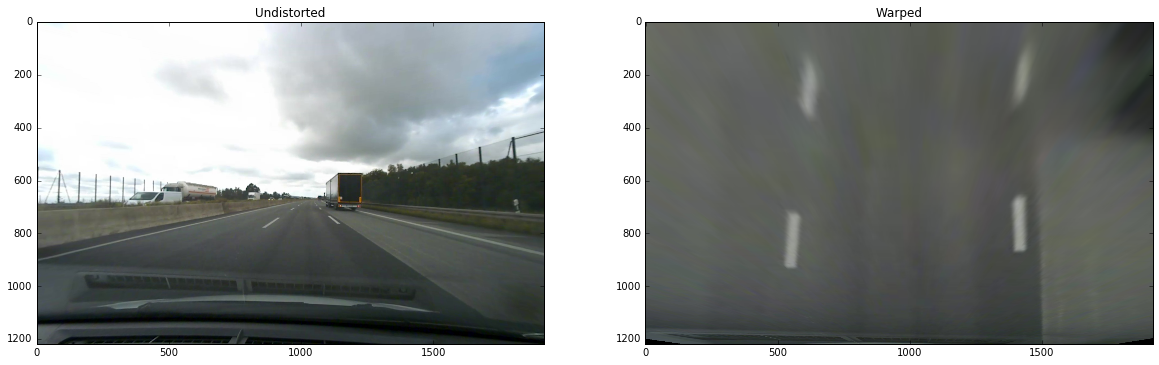

In [33]:
# Load all test images
images = glob.glob('test_images/*.jpg')
# images = ['test_images/vlcsnap-00001.jpg']

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    undistorted = undistort_image(img, mtx, dist)
    
    warped, M, Minv = warp_image(undistorted, extrinsic_src, extrinsic_dst)
    # print(warped.shape)
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
    ax1.imshow(undistorted)
    ax1.set_title('Undistorted')
    ax2.imshow(warped)
    ax2.set_title('Warped')

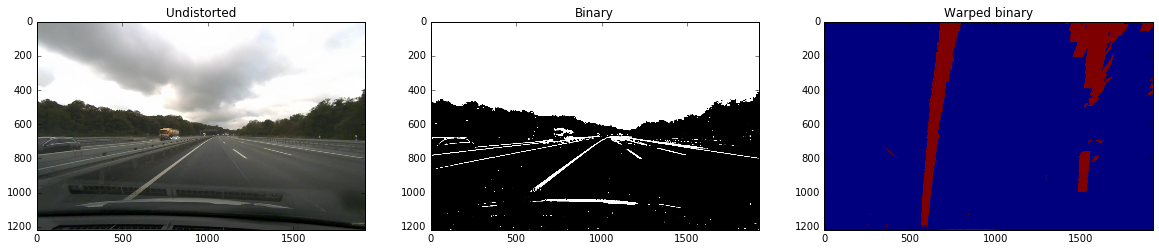

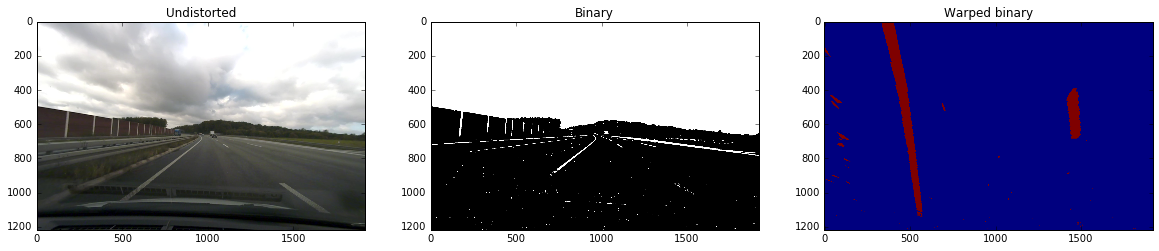

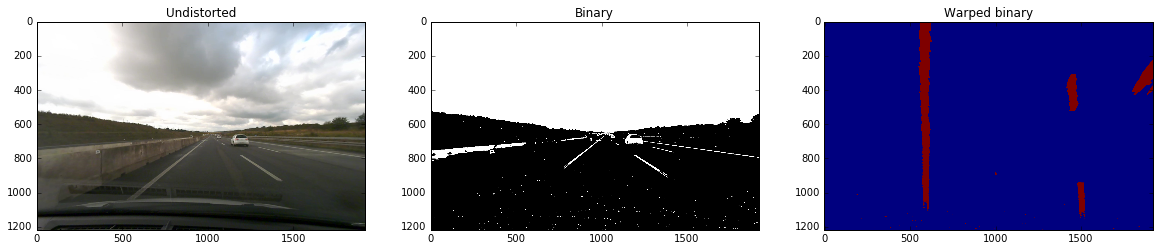

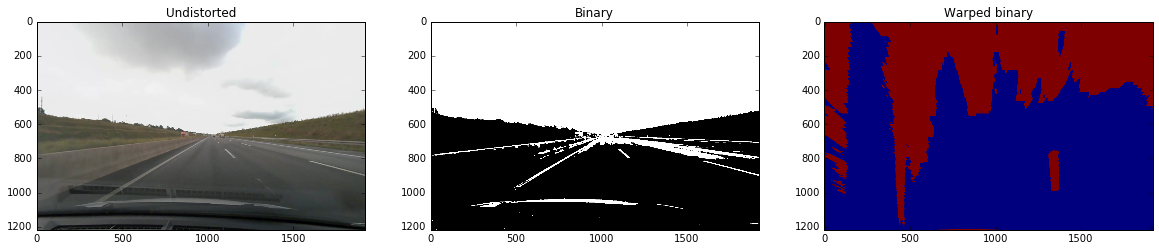

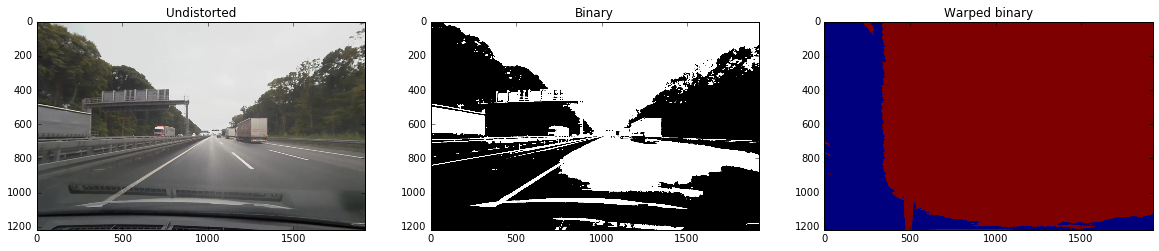

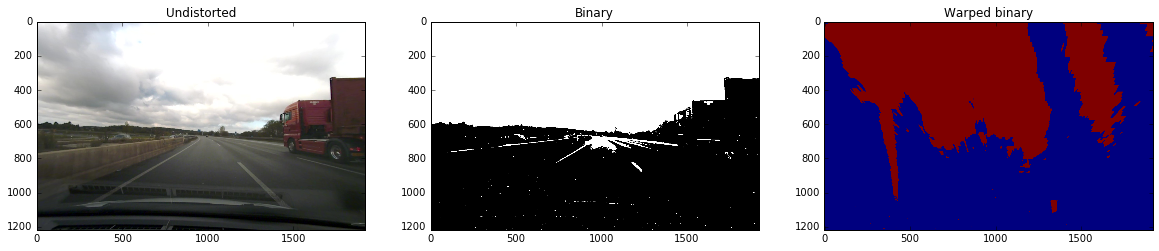

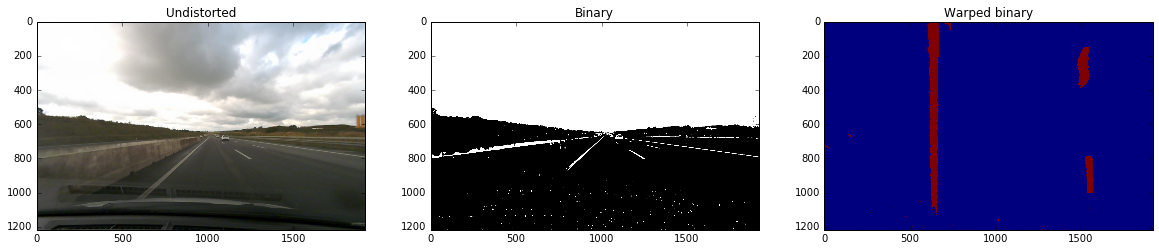

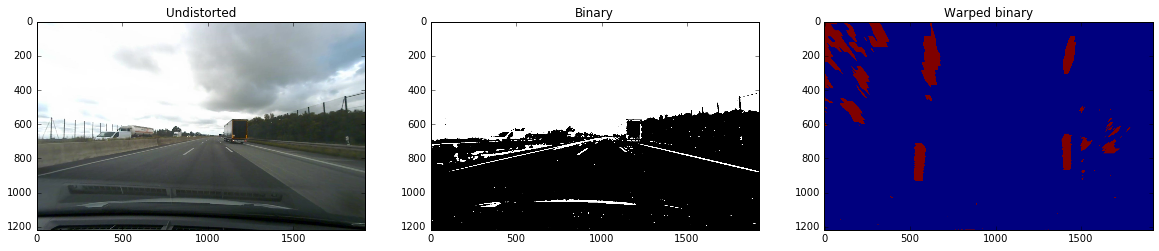

In [35]:
# Load all test images
images = glob.glob('test_images/*.jpg')
# images = ['test_images/vlcsnap-00001.jpg']

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    undistorted = undistort_image(img, mtx, dist)
    
    color_binary = color_select(undistorted)
    combined_binary = np.zeros_like(color_binary)
    combined_binary[(color_binary == 1)] = 1
    
    warped, M, Minv = warp_image(combined_binary, extrinsic_src, extrinsic_dst)
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
    ax1.imshow(undistorted)
    ax1.set_title('Undistorted')
    ax2.imshow(combined_binary, cmap='gray')
    ax2.set_title('Binary')
    ax3.imshow(warped)
    ax3.set_title('Warped binary')